In [79]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

# 将数据按timestamp对齐，保存为merge_data.csv

In [72]:
folder_path = "./Data"
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

csv_header_name = []
for i in range(len(csv_files)+1):
    if(i==0):
        csv_header_name.append('timestamp')
    else:
        csv_header_name.append(csv_files[i-1][:-4])
print(csv_header_name)

dataframes = []
#读取所有csv文件的数据
for file in csv_files:
    df = pd.read_csv("./Data/" + file)
    dataframes.append(df)

#将所有csv文件按timestamp相同的数进行merge
for i in range(len(dataframes)):
    if(i==0):
        merge_Data = dataframes[0]
    else:
        merge_Data = merge_Data.merge(dataframes[i], on='timestamp')
#     print('i',i,'data',merge_Data)


# 将新的DataFrame写入新的CSV文件
merge_Data.to_csv('./merge_data.csv', index=False, header=csv_header_name)

['timestamp', 'bitcoin-mean-hash-rate', 'bitcoin-number-of-active-addresses', 'bitcoin-number-of-addresses-with-a-non-zero-balance', 'bitcoin-number-of-addresses-with-balance-0-01', 'bitcoin-number-of-addresses-with-balance-0-1', 'bitcoin-number-of-addresses-with-balance-1', 'bitcoin-number-of-addresses-with-balance-10', 'bitcoin-number-of-addresses-with-balance-100', 'bitcoin-number-of-addresses-with-balance-10k', 'bitcoin-number-of-addresses-with-balance-1k', 'bitcoin-number-of-new-addresses', 'bitcoin-number-of-sending-addresses', 'bitcoin-price-usd', 'bitcoin-total-transfer-volume-between-exchanges-btc-from-all-exchanges-to-all-exchanges', 'bitcoin-total-transfer-volume-within-exchanges-btc-all-exchanges', 'ethereum-price-usd']


In [117]:
all_data = pd.read_csv("merge_data.csv")
selected_columns = ['timestamp','bitcoin-mean-hash-rate', 'bitcoin-number-of-active-addresses', 'bitcoin-number-of-addresses-with-a-non-zero-balance', 'bitcoin-number-of-addresses-with-balance-0-01', 'bitcoin-number-of-addresses-with-balance-0-1', 'bitcoin-number-of-addresses-with-balance-1', 'bitcoin-number-of-addresses-with-balance-10', 'bitcoin-number-of-addresses-with-balance-100', 'bitcoin-number-of-addresses-with-balance-10k', 'bitcoin-number-of-addresses-with-balance-1k', 'bitcoin-number-of-new-addresses', 'bitcoin-number-of-sending-addresses', 'bitcoin-total-transfer-volume-between-exchanges-btc-from-all-exchanges-to-all-exchanges', 'bitcoin-total-transfer-volume-within-exchanges-btc-all-exchanges',  'bitcoin-price-usd','ethereum-price-usd']
data = all_data[selected_columns]
data

,timestamp,bitcoin-mean-hash-rate,bitcoin-number-of-active-addresses,bitcoin-number-of-addresses-with-a-non-zero-balance,bitcoin-number-of-addresses-with-balance-0-01,bitcoin-number-of-addresses-with-balance-0-1,bitcoin-number-of-addresses-with-balance-1,bitcoin-number-of-addresses-with-balance-10,bitcoin-number-of-addresses-with-balance-100,bitcoin-number-of-addresses-with-balance-10k,bitcoin-number-of-addresses-with-balance-1k,bitcoin-number-of-new-addresses,bitcoin-number-of-sending-addresses,bitcoin-total-transfer-volume-between-exchanges-btc-from-all-exchanges-to-all-exchanges,bitcoin-total-transfer-volume-within-exchanges-btc-all-exchanges,bitcoin-price-usd,ethereum-price-usd
0,2015-08-08T00:00:00Z,4.005588e+17,272741,5262346,1696360,818675,392959,127484,16543,100,1726,135445,168706,1493.585926,89004.249235,262.054197,0.769981
1,2015-08-09T00:00:00Z,3.667415e+17,267531,5266636,1694806,817990,392844,127305,16409,106,1733,108041,152905,1668.788937,120925.499589,267.513289,0.719830
2,2015-08-10T00:00:00Z,4.328745e+17,292493,5265328,1694197,817951,392994,127467,16449,106,1717,145061,201821,1326.580611,56347.277777,264.791755,0.700705
3,2015-08-11T00:00:00Z,4.229511e+17,268340,5268720,1697426,819345,393526,127465,16446,106,1716,148776,193279,2181.753458,102018.837901,271.718664,1.088361
4,2015-08-12T00:00:00Z,3.215115e+17,277300,5279346,1701810,822001,394445,127624,16432,106,1709,156114,193789,2798.148083,150077.861994,267.346470,1.214071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,2023-05-17T00:00:00Z,3.810207e+20,841964,46825182,12048467,4371727,1001560,156518,16043,117,2025,403288,513358,5477.551402,178899.400492,27402.019580,1821.538934
2840,2023-05-18T00:00:00Z,3.506605e+20,819906,46880758,12055861,4372734,1001634,156467,16039,116,2032,392782,492493,4433.859512,143083.824475,26834.612749,1801.559126
2841,2023-05-19T00:00:00Z,3.653256e+20,910166,46928671,12067615,4373849,1001565,156406,16038,117,2035,449302,537828,3508.338359,117371.074551,26876.996321,1811.729647
2842,2023-05-20T00:00:00Z,3.206916e+20,743184,46992078,12069045,4373202,1001640,156443,16030,117,2033,363847,448176,1963.677630,84931.596612,27123.230258,1820.084617


# 可视化每一个特征与bitcoin-price-usd的走势

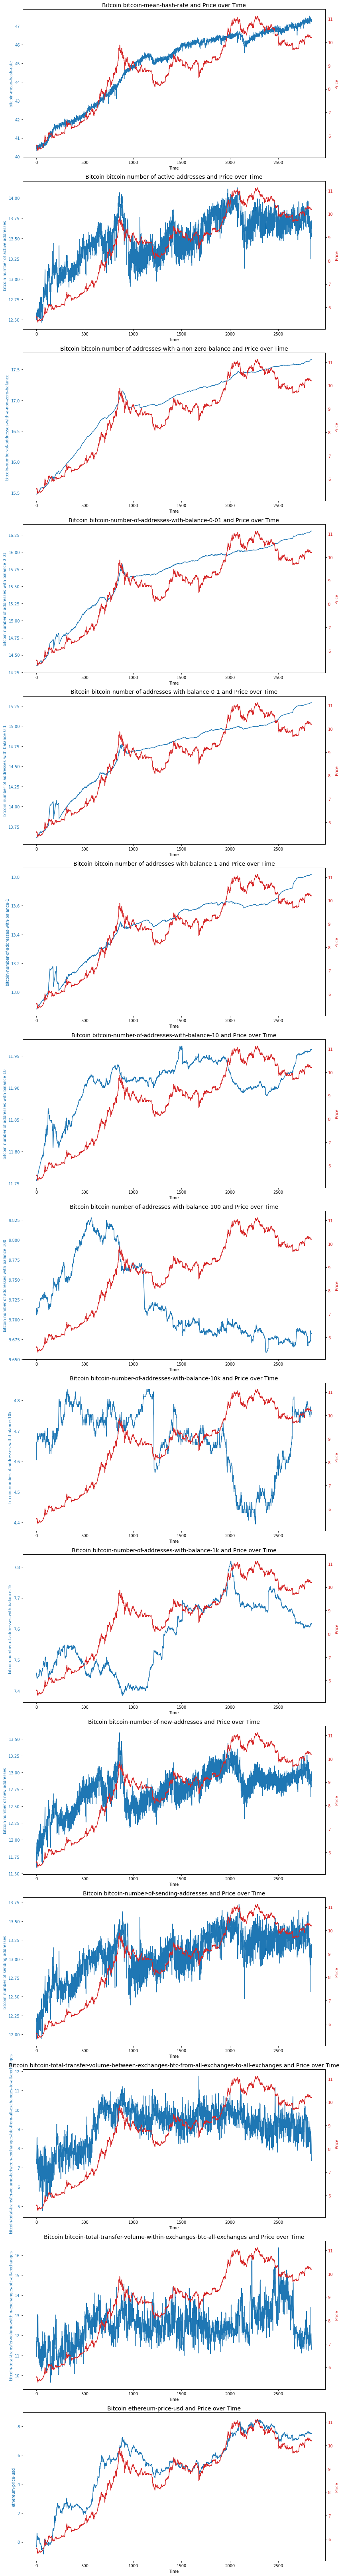

In [123]:
features = ['bitcoin-mean-hash-rate', 'bitcoin-number-of-active-addresses', 'bitcoin-number-of-addresses-with-a-non-zero-balance', 
            'bitcoin-number-of-addresses-with-balance-0-01', 'bitcoin-number-of-addresses-with-balance-0-1', 
            'bitcoin-number-of-addresses-with-balance-1', 'bitcoin-number-of-addresses-with-balance-10', 
            'bitcoin-number-of-addresses-with-balance-100', 'bitcoin-number-of-addresses-with-balance-10k', 
            'bitcoin-number-of-addresses-with-balance-1k', 'bitcoin-number-of-new-addresses',
            'bitcoin-number-of-sending-addresses','bitcoin-total-transfer-volume-between-exchanges-btc-from-all-exchanges-to-all-exchanges', 
            'bitcoin-total-transfer-volume-within-exchanges-btc-all-exchanges', 'ethereum-price-usd']

# 创建左右两个坐标轴
fig, axs = plt.subplots(nrows=len(features), ncols=1,
                        figsize=(12, 6*len(features)))

# 循环遍历每个特征并绘制图表
for i, feature in enumerate(features):
    # 绘制特征的线图
    color = 'tab:blue'
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(feature, color=color)
    axs[i].plot(data.index, np.log(data[feature]), color=color)
    axs[i].tick_params(axis='y', labelcolor=color)

    # 创建第二个坐标轴，共享x轴
    ax2 = axs[i].twinx()
    # 绘制价格的线图
    color = 'tab:red'
    ax2.set_ylabel('Price', color=color)
    ax2.plot(data.index, np.log(data['bitcoin-price-usd']), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # 设置标题
    axs[i].set_title(
        'Bitcoin {} and Price over Time'.format(feature), fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()

# hash-rate和price的关系化分析与可视化

Bitcoin Hash Rate vs Price Correlation Matrix:
                        bitcoin-mean-hash-rate  bitcoin-price-usd
bitcoin-mean-hash-rate                1.000000           0.658008
bitcoin-price-usd                     0.658008           1.000000

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=2842, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=nan     , p=nan     , df_denom=2842, df_num=0
Granger Causality Test Results:
Lag: 1
Null Hypothesis (H0): 0.0
Alternative Hypothesis (H1): 1.0
p-value: 1.0
-------------------------------------------


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


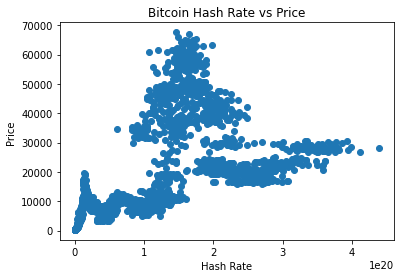

In [125]:
# 选择所需的列进行分析
selected_hashrate_price_columns = ['bitcoin-mean-hash-rate', 'bitcoin-price-usd']
hashrate_price_data = data[selected_hashrate_price_columns]


# 计算相关系数
correlation = hashrate_price_data.corr()
print("Bitcoin Hash Rate vs Price Correlation Matrix:")
print(correlation)

# 进行因果关系分析（Granger Causality Test）
model_gct_hp = sm.tsa.stattools.grangercausalitytests(hashrate_price_data, maxlag=1)


# 打印因果关系检验结果
print("Granger Causality Test Results:")
for lag in model_gct_hp.keys():
    print("Lag:", lag)
    print("Null Hypothesis (H0):", model_gct_hp[lag][0]['ssr_chi2test'][0])
    print("Alternative Hypothesis (H1):", model_gct_hp[lag][0]['ssr_chi2test'][1])
    print("p-value:", model_gct_hp[lag][0]['ssr_chi2test'][1])
    print("-------------------------------------------")
    
# 绘制哈希率和价格之间的关系图
plt.scatter(hashrate_price_data['bitcoin-mean-hash-rate'], hashrate_price_data['bitcoin-price-usd'])
plt.xlabel('Hash Rate')
plt.ylabel('Price ')
plt.title('Bitcoin Hash Rate vs Price')
plt.show()

#分析：
'''
相关性分析：相关系数矩阵显示比特币哈希率和价格之间的相关系数为0.658008，表明它们之间存在中度正相关关系。
这意味着比特币的哈希率和价格在一定程度上是同步变化的，但并不具有强烈的线性关系。

因果关系分析：格兰杰因果关系检验的结果显示，在1个滞后阶数下，基于ssr的F检验和卡方检验的p值都为1.0000，
不支持比特币哈希率对价格具有统计显著的因果影响。这意味着在给定的滞后阶数下，无法得出比特币哈希率对价格有因果影响的结论。

综上所述，根据分析结果可以得出结论：比特币哈希率和价格之间存在一定的正相关关系，但不能确定比特币哈希率对价格具有因果影响。
这意味着比特币的哈希率变化可能与价格的波动存在某种联系，但不能单纯依靠哈希率来预测价格的变化。
'''

# Active和price的关系化分析与可视化


Active vs Price Correlation Matrix:
                                    bitcoin-number-of-active-addresses  \
bitcoin-number-of-active-addresses                            1.000000   
bitcoin-price-usd                                             0.674372   

                                    bitcoin-price-usd  
bitcoin-number-of-active-addresses           0.674372  
bitcoin-price-usd                            1.000000  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=112.5715, p=0.0000  , df_denom=2840, df_num=1
ssr based chi2 test:   chi2=112.6904, p=0.0000  , df=1
likelihood ratio test: chi2=110.5143, p=0.0000  , df=1
parameter F test:         F=112.5715, p=0.0000  , df_denom=2840, df_num=1
Granger Causality Test Results:
Lag: 1
Null Hypothesis (H0): 112.69039674753357
Alternative Hypothesis (H1): 2.5224117046462356e-26
p-value: 2.5224117046462356e-26
-------------------------------------------


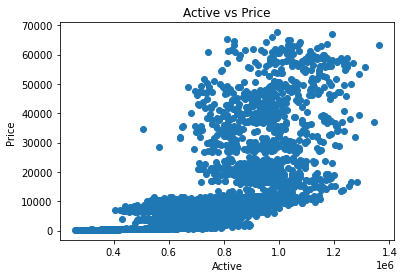

In [127]:
# 选择所需的列进行分析
selected_active_price_columns = ['bitcoin-number-of-active-addresses', 'bitcoin-price-usd']
active_price_data = data[selected_active_price_columns]


# 计算相关系数
correlation_ap = active_price_data.corr()
print("Active vs Price Correlation Matrix:")
print(correlation_ap)

# 进行因果关系分析（Granger Causality Test）
model_gct_ap = sm.tsa.stattools.grangercausalitytests(active_price_data, maxlag=1)

# 打印因果关系检验结果
print("Granger Causality Test Results:")
for lag in model_gct_ap.keys():
    print("Lag:", lag)
    print("Null Hypothesis (H0):", model_gct_ap[lag][0]['ssr_chi2test'][0])
    print("Alternative Hypothesis (H1):", model_gct_ap[lag][0]['ssr_chi2test'][1])
    print("p-value:", model_gct_ap[lag][0]['ssr_chi2test'][1])
    print("-------------------------------------------")
    
# 绘制哈希率和价格之间的关系图
plt.scatter(active_price_data['bitcoin-number-of-active-addresses'], active_price_data['bitcoin-price-usd'])
plt.xlabel('Active')
plt.ylabel('Price ')
plt.title('Active vs Price')
plt.show()

# bitcoin-number-of-addresses-with-balance-10k和price的关系化分析与可视化

Active vs Price Correlation Matrix:
                                              bitcoin-number-of-addresses-with-balance-10k  \
bitcoin-number-of-addresses-with-balance-10k                                      1.000000   
bitcoin-price-usd                                                                -0.754022   

                                              bitcoin-price-usd  
bitcoin-number-of-addresses-with-balance-10k          -0.754022  
bitcoin-price-usd                                      1.000000  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0663  , p=0.0045  , df_denom=2840, df_num=1
ssr based chi2 test:   chi2=8.0749  , p=0.0045  , df=1
likelihood ratio test: chi2=8.0634  , p=0.0045  , df=1
parameter F test:         F=8.0663  , p=0.0045  , df_denom=2840, df_num=1
Granger Causality Test Results:
Lag: 1
Null Hypothesis (H0): 8.074866743841374
Alternative Hypothesis (H1): 0.0044883407788219596
p-value: 0.0044883407788219596
------------------

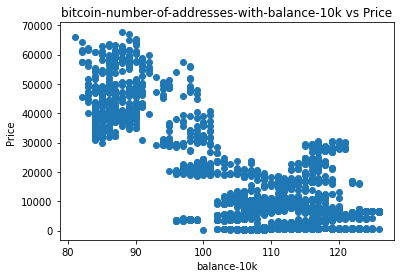

In [131]:
# 选择所需的列进行分析
selected_10k_price_columns = ['bitcoin-number-of-addresses-with-balance-10k', 'bitcoin-price-usd']
k10_price_data = data[selected_10k_price_columns]


# 计算相关系数
correlation_k10p = k10_price_data.corr()
print("Active vs Price Correlation Matrix:")
print(correlation_k10p)

# 进行因果关系分析（Granger Causality Test）
model_gct_k10p = sm.tsa.stattools.grangercausalitytests(k10_price_data, maxlag=1)

# 打印因果关系检验结果
print("Granger Causality Test Results:")
for lag in model_gct_k10p.keys():
    print("Lag:", lag)
    print("Null Hypothesis (H0):", model_gct_k10p[lag][0]['ssr_chi2test'][0])
    print("Alternative Hypothesis (H1):", model_gct_k10p[lag][0]['ssr_chi2test'][1])
    print("p-value:", model_gct_k10p[lag][0]['ssr_chi2test'][1])
    print("-------------------------------------------")
    
# 绘制哈希率和价格之间的关系图
plt.scatter(k10_price_data['bitcoin-number-of-addresses-with-balance-10k'], k10_price_data['bitcoin-price-usd'])
plt.xlabel('balance-10k')
plt.ylabel('Price ')
plt.title('bitcoin-number-of-addresses-with-balance-10k vs Price')
plt.show()

# bitcoin price 与 ethereum-price 可视化

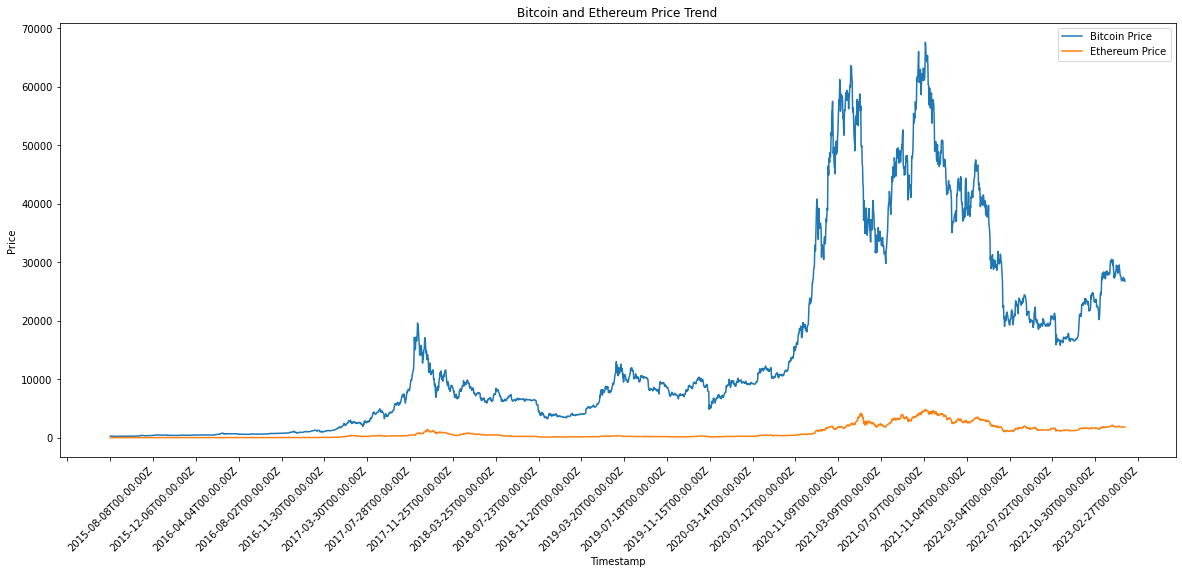

In [89]:
fig = plt.figure(figsize=(20, 8))
plt.plot(data['timestamp'], data['bitcoin-price-usd'], label='Bitcoin Price')
plt.plot(data['timestamp'], data['ethereum-price-usd'], label='Ethereum Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()  
plt.title('Bitcoin and Ethereum Price Trend')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(120))   
plt.show()

# bitcoin price 与 ethereum-price关系分析

In [108]:
import statsmodels.api as sm

selected_price_columns = ['bitcoin-price-usd', 'ethereum-price-usd']
correlation_data = data[selected_price_columns]

#计算这两个变量之间的相关系数，以衡量它们之间的线性关系强度
correlation = correlation_data.corr()
print("Correlation Matrix:")
print(correlation)

# 进行因果关系分析（Granger Causality Test）评估比特币价格对以太坊价格的因果关系
model_gct = sm.tsa.stattools.grangercausalitytests(correlation_data, maxlag=1)

# 因果关系检验结果
print("Granger Causality Test Results:")
for lag in model_gct.keys():
    print("Lag:", lag)
    print("Null Hypothesis (H0):", model_gct[lag][0]['ssr_chi2test'][0])
    print("Alternative Hypothesis (H1):", model_gct[lag][0]['ssr_chi2test'][1])
    print("p-value:", model_gct[lag][0]['ssr_chi2test'][1])
    print("-------------------------------------------")

Correlation Matrix:
                    bitcoin-price-usd  ethereum-price-usd
bitcoin-price-usd            1.000000            0.937912
ethereum-price-usd           0.937912            1.000000

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.8359 , p=0.0000  , df_denom=2840, df_num=1
ssr based chi2 test:   chi2=19.8568 , p=0.0000  , df=1
likelihood ratio test: chi2=19.7878 , p=0.0000  , df=1
parameter F test:         F=19.8359 , p=0.0000  , df_denom=2840, df_num=1
Granger Causality Test Results:
Lag: 1
Null Hypothesis (H0): 19.856845301870386
Alternative Hypothesis (H1): 8.346332091411205e-06
p-value: 8.346332091411205e-06
-------------------------------------------


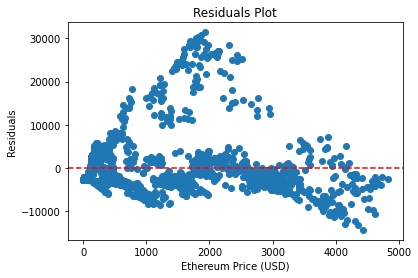

Cointegration Analysis:
                            OLS Regression Results                            
Dep. Variable:      bitcoin-price-usd   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        10:40:06   Log-Likelihood:                -28602.
No. Observations:                2844   AIC:                         5.721e+04
Df Residuals:                    2842   BIC:                         5.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const       

In [109]:
# 将以太坊价格作为自变量、比特币价格作为因变量，计算价格之间的协整性。协整性分析可以帮助确定两个时间序列是否具有长期稳定的关系。
model_ols = sm.OLS(correlation_data['bitcoin-price-usd'], sm.add_constant(correlation_data['ethereum-price-usd'])).fit()
residuals = model_ols.resid

# 绘制残差图
plt.plot(data['ethereum-price-usd'], residuals, 'o')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Ethereum Price (USD)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 打印协整性分析结果
print("Cointegration Analysis:")
print(model_ols.summary())

In [128]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


# 将训练数据分为输入（features）和输出（labels）变量
features = data.iloc[:, 1:15]
# print(features)

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 对特征进行归一化处理
scaled_features = scaler.fit_transform(features)

# 提取标签
labels = all_data.iloc[:, 15]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)


# 定义XGBoost模型
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate test loss
test_loss = mean_squared_error(y_test, y_pred)


metrics_dict = {}
# 计算均方误差（MSE）
metrics_dict['MSE'] = mean_squared_error(y_test, y_pred)

# 计算均方根误差（RMSE）
metrics_dict['rmse'] = mean_squared_error(y_test, y_pred, squared=False)

# 计算平均绝对误差（MAE）
metrics_dict['mae'] = mean_absolute_error(y_test, y_pred)

# 计算平均绝对百分比误差（MAPE）
metrics_dict['mape'] = mean_absolute_percentage_error(y_test, y_pred)

# 计算对称平均绝对百分比误差（SMAPE）
metrics_dict['smape'] = 2 * mape

# 计算确定系数（R²）
metrics_dict['r2']  = r2_score(y_test, y_pred)

result = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])
print(result)

              Value
MSE    1.311479e+10
rmse   1.145198e+05
mae    1.466294e+04
mape   1.241848e-02
smape  1.615452e-01
r2     9.815814e-01


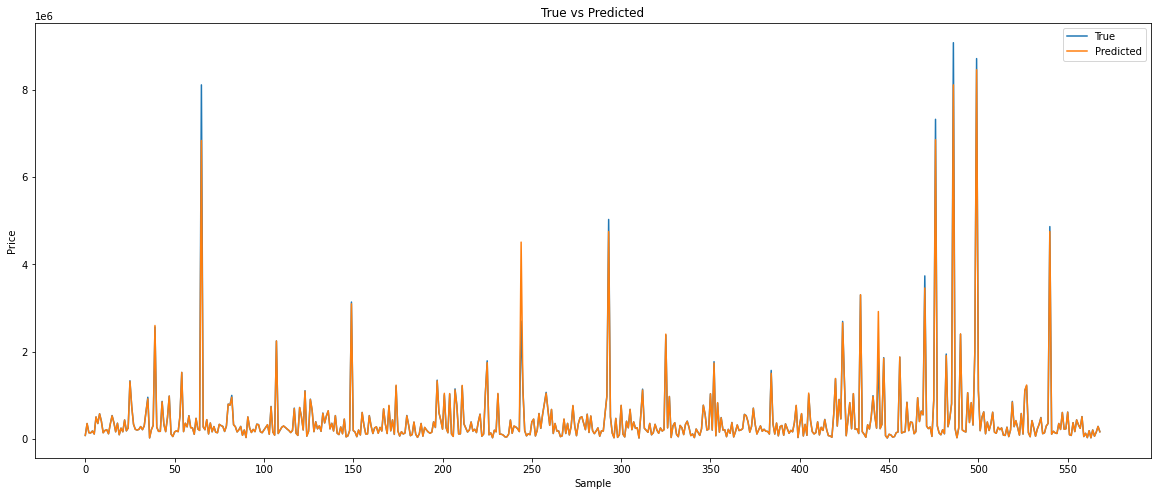

In [129]:
# 绘制预测结果和真实结果的折线图
fig = plt.figure(figsize=(20, 8))
plt.plot(range(len(y_test)), y_test, label='True')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted')
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))   
plt.show()

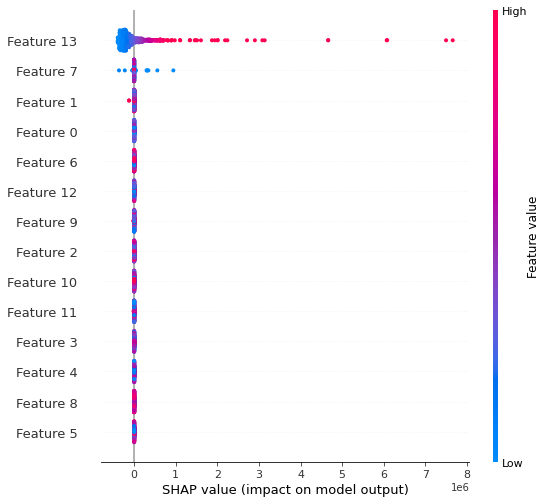

In [139]:
import shap
# 模型可解释性
explainer=shap.TreeExplainer(model)
# 在explainer中传入特征值的数据，计算shap值
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)